# Scipy.optimize包的使用
最优化问题分类：
1. 求根（Root-Finding）
2. 最小二乘（Least-Squares）
3. 无约束优化（Unconstrained optimization）
4. 有约束优化（Constrained optimization）
5. 线性规划（Linear Programming）
5. 全局优化（Global optimization）
6. 其他优化（最短路径、邮差问题、背包问题、最大流/最小割问题、整数优化等）

进一步阅读：

- [Optimization (scipy.optimize)](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
- [Optimization and root finding (scipy.optimize) ](https://docs.scipy.org/doc/scipy/reference/optimize.html)
- [Matrix calculus](https://en.wikipedia.org/wiki/Matrix_calculus)

注意：余下部分$x$有时表示标量（$x\in R$），有时表示向量（$x\in R^n$）。

# 1.求根（Root-Finding）
## 1.1 标量函数（Scalar Function）
求函数$f(x)=0$的解，其中$x$是标量（$x\in R$），$f:R\rightarrow R$。

例如
$x+2cos(x)=0$
可以用如下函数求解：
- brentq(f, a, b[, args, xtol, rtol, maxiter, …])	Find a root of a function in a bracketing interval using Brent’s method.
- brenth(f, a, b[, args, xtol, rtol, maxiter, …])	Find root of f in [a,b].
- ridder(f, a, b[, args, xtol, rtol, maxiter, …])	Find a root of a function in an interval.
- bisect(f, a, b[, args, xtol, rtol, maxiter, …])	Find root of a function within an interval.
- newton(func, x0[, fprime, args, tol, …])	Find a zero using the Newton-Raphson or secant method.

In [26]:
from scipy.optimize import brentq,brenth,ridder,bisect,newton,fixed_point
from numpy import cos,sin
#方程
def f(x):
    return x+2*cos(x)
#导数
def df(x):
    return 1-2*sin(x)
x=brentq(f,a=-5,b=0)
print("brenthq: x=",root,"f(x)=",f(x))
x=brenth(f,a=-5,b=0)
print("brenth: x=",x,"f(x)=",f(x))
x=ridder(f,a=-10,b=20)
print("ridder: x=",x,"f(x)=",f(x))
x=bisect(f,a=-10,b=20)
print("bisect: x=",x,"f(x)=",f(x))
x=newton(f,x0=5,fprime=df)
print("newton: x=",x,"f(x)=",f(x))

brenthq: x= 1.5707963267948966 f(x)= 0.0
brenth: x= -1.0298665293222589 f(x)= 0.0
ridder: x= -1.0298665293222589 f(x)= 0.0
bisect: x= -1.029866529323158 f(x)= -2.440492252731019e-12
newton: x= -1.0298665293222589 f(x)= 0.0


解方程$f(x)=x$,使用如下函数：

fixed_point(func, x0[, args, xtol, maxiter, …])	Find a fixed point of the function.

解方程$x+2cos(x)=x$

In [27]:
from scipy.optimize import fixed_point
from numpy import cos
#方程
def f(x):
    return x+2*cos(x)
x=fixed_point(f,x0=0) 
print("fixed_point: x=",x,"f(x)=",f(x))

fixed_point: x= 1.5707963267948966 f(x)= 1.5707963267948968


## 1.2 向量函数（Vector Function）
求函数$f(x)=0$的解，其中$x\in R^m$是标量，$f:R^m\rightarrow R^n$。

注意：$n\ge m$时方程有解。

例如$x=(x_1,x_2,x_3)^T$

$f(x)=\begin{bmatrix}f_1(x)\\f_2(x)\\f_3(x)\end{bmatrix}=\begin{bmatrix}f_1(x_1,x_2,x_3)\\f_2(x_1,x_2,x_3)\\f_3(x_1,x_2,x_3)\end{bmatrix}=\begin{bmatrix}2*x_1+3*x_2+4*x_3-4\\x_1^2+3*x_2-x_3-5\\x_1+2*x_2+cos(x_3)-2\end{bmatrix}=\begin{bmatrix}0\\0\\0\end{bmatrix}$

General nonlinear solvers:

- root(fun, x0[, args, method, jac, tol, …])	Find a root of a vector function.
- fsolve(func, x0[, args, fprime, …])	Find the roots of a function.
- broyden1(F, xin[, iter, alpha, …])	Find a root of a function, using Broyden’s first Jacobian approximation.
- broyden2(F, xin[, iter, alpha, …])	Find a root of a function, using Broyden’s second Jacobian approximation.

The root function supports the following methods:

- root(method=’hybr’)
- root(method=’lm’)
- root(method=’broyden1’)
- root(method=’broyden2’)
- root(method=’anderson’)
- root(method=’linearmixing’)
- root(method=’diagbroyden’)
- root(method=’excitingmixing’)
- root(method=’krylov’)
- root(method=’df-sane’)

Large-scale nonlinear solvers:

- newton_krylov(F, xin[, iter, rdiff, method, …])	Find a root of a function, using Krylov approximation for inverse Jacobian.
- anderson(F, xin[, iter, alpha, w0, M, …])	Find a root of a function, using (extended) Anderson mixing.

Simple iterations:

- excitingmixing(F, xin[, iter, alpha, …])	Find a root of a function, using a tuned diagonal Jacobian approximation.
- linearmixing(F, xin[, iter, alpha, verbose, …])	Find a root of a function, using a scalar Jacobian approximation.
- diagbroyden(F, xin[, iter, alpha, verbose, …])	Find a root of a function, using diagonal Broyden Jacobian approximation.

下面用Levenberg-Marquardt算法求解

$f(x)=\begin{bmatrix}f_1(x)\\f_2(x)\\f_3(x)\end{bmatrix}=\begin{bmatrix}f_1(x_1,x_2,x_3)\\f_2(x_1,x_2,x_3)\\f_3(x_1,x_2,x_3)\end{bmatrix}=\begin{bmatrix}2*x_1+3*x_2+4*x_3-4\\x_1^2+3*x_2-x_3-5\\x_1+2*x_2+cos(x_3)-2\end{bmatrix}=\begin{bmatrix}0\\0\\0\end{bmatrix}$

该算法需要$f(x)$的Jacobian matrix：

$\frac{\partial f(x)}{\partial x}=\begin{bmatrix}\frac{\partial f_1(x)}{\partial x}\\\frac{\partial f_2(x)}{\partial x}\\\frac{\partial f_3(x)}{\partial x}\end{bmatrix}=\begin{bmatrix}\frac{\partial f_1(x)}{\partial x_1}&\frac{\partial f_1(x)}{\partial x_2}&\frac{\partial f_1(x)}{\partial x_3}\\\frac{\partial f_2(x)}{\partial x_1}&\frac{\partial f_2(x)}{\partial x_2}&\frac{\partial f_2(x)}{\partial x_3}\\\frac{\partial f_3(x)}{\partial x_1}&\frac{\partial f_3(x)}{\partial x_2}&\frac{\partial f_3(x)}{\partial x_3}\end{bmatrix}=\begin{bmatrix}2&3&4\\2*x_1&3&-1\\1&2&-sin(x_2)\end{bmatrix}$

In [67]:
from scipy.optimize import root
from numpy import array,cos,sin
#函数
def f(x):
    f1=2*x[0]+3*x[1]+4*x[2]-4
    f2=x[0]**2+3*x[1]-x[2]-5
    f3=x[0]+2*x[1]+cos(x[2])-2
    return array([f1,f2,f3])
#Jacobian matrix
def jf(x):
    gf1=[2,3,4] #对f1分别求x1，x2，x3的偏导数
    gf2=[2*x[0],3,-1] #对f2分别求x1，x2，x3的偏导数
    gf3=[1,2,-sin(x[2])] #对f3分别求x1，x2，x3的偏导数
    return array([gf1,gf2,gf3])
def f_jf(x):
    return f(x),jf(x)
sol=root(f_jf,x0=[0,0,0],jac=True,method='lm')
print("jac=True,x=",sol.x,"f(x)=",f(sol.x),"f计算次数=",sol.nfev)
#也可以不提供Jacobian Matrix，算法会自动计算一个
sol=root(f,x0=[0,0,0],jac=False,method='lm')
print("jac=False,x=",sol.x,"f(x)=",f(sol.x),"f计算次数=",sol.nfev)

#from scipy.optimize import excitingmixing,linearmixing,diagbroyden
#excitingmixing,linearmixing,diagbroyden无法解决此方程，但可以解决特定的方程

jac=True,x= [-1.34997681  1.29401361  0.7044782 ] f(x)= [ 0.0000000e+00 -8.8817842e-16  0.0000000e+00] f计算次数= 11
jac=False,x= [-1.34997681  1.29401361  0.7044782 ] f(x)= [0. 0. 0.] f计算次数= 35


# 2.最小二乘
scipy的最小二乘函数可以解决如下问题：

$\mathop{\arg\min}_{x} \frac{1}{2}\sum_{i}\rho(f_i(x)^2)$并且$x\in[lb,ub]$

其中$x\in R^n$，$f_i:R^n\rightarrow R$


如果$f_i$是线性函数（形式如$kx+b$），则是线性最小二乘，通常表示为：
$\mathop{\arg\min}_{x} \frac{1}{2}||Ax-b||^2$，其中A是$m\times n$的矩阵

如果$f_i$是非线性函数（形式如$sin(x)$或者$x^k$、$e^x$等），则是非线性最小二乘，可以表示为：
$\mathop{\arg\min}_{x} \frac{1}{2}||F(x)||^2$，其中$F(x)=(f_1(x),f_2(x),...,f_m(x))^T$

另外还有加权最小二乘（weighted least squares）和迭代加权最小二乘（iteratively weighted least squares）等其他最小二乘。

least_squares函数用于求解各种最小二乘问题。
## 2.1 曲线拟合
有一组观测数据$x=(x_1,x_2,x_3,...,x_n)$和$y=(y_1,y_2,y_3,...,y_n)$如下：

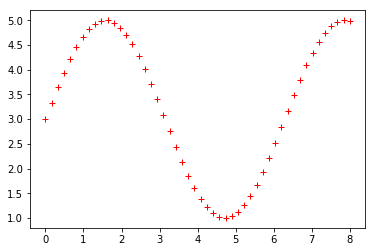

In [132]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,8,50)
y=2*sin(x)+3
plt.plot(x,y,'r+')

该曲线拟合问题等价于如下最小二乘问题：
$f(x,y,a,b)=a*sin(x)+b-y$

$E(x,y,a,b)=\frac{1}{2}||f(x,y,a,b)||^2=\frac{1}{2}||a*sin(x)+b-y||^2=\frac{1}{2}\sum_{i}(a*sin(x_i)+b-y_i)^2$

$a,b=\mathop{\arg\min}_{a,b} E(x,y,a,b)$





In [181]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
def f(ab,x,y):
    a,b=ab
    return a*np.sin(x)+b-y
res=least_squares(f,x0=[0,0],args=(x,y))
print("a=",res.x[0],"b=",res.x[1])

a= 2.0 b= 3.0


## 2.2图像变换
将图像A移动到图像B的特定区域，即将图像A上点$(x_a,y_a)$移动到图像B上点$(x_b,y_b)$，则二者之间有如下关系:

$\begin{bmatrix}x_b\\y_b\end{bmatrix}=H\begin{bmatrix}x_a\\y_a\end{bmatrix}+T$

进一步分析$H$是$2\times 2$的矩阵，$T$是$2\times 1$的矩阵。若能求出$H$和$T$，那么就能建立两张图的变换关系。$H$和$T$共有6个参数，故此至少需要6个方程，每组点对可以提供2个方程，则至少需要3组点对。假设已知$n$组点对（$n\ge 3$）,则存在如下方程：

$\begin{bmatrix}x_b^1&x_b^2&...&x_b^n\\y_b^1&y_b^2&...&y_b^n\end{bmatrix}=H\begin{bmatrix}x_a^1&x_a^2&...&x_a^n\\y_a^1&y_a^2&...&y_a^n\end{bmatrix}+T$

简写为如下形式：

$P_b^n=HP_a^n+T$

如何求$H$和$T$?
若$H=\begin{bmatrix}h_1&h_2\\h_3&h_4\end{bmatrix}$，$T=\begin{bmatrix}t_1\\t_2\end{bmatrix}$，则上面的代数式可以整理为：

$\begin{bmatrix}x_a^1&y_a^1&0&0&1&0\\0&0&x_a^1&y_a^1&0&1\\x_a^2&y_a^2&0&0&1&0\\0&0&x_a^2&y_a^2&0&1\\...\\x_a^n&y_a^n&0&0&1&0\\0&0&x_a^n&y_a^n&0&1\end{bmatrix}\begin{bmatrix}h_1\\h_2\\h_3\\h_4\\t_1\\t_2\end{bmatrix}=\begin{bmatrix}x_b^1\\y_b^1\\x_b^2\\y_b^2\\...\\x_n^2\\y_n^2\end{bmatrix}$

上述方程可以看做$AX=b$的方程，其中

$A=\begin{bmatrix}x_a^1&y_a^1&0&0&1&0\\0&0&x_a^1&y_a^1&0&1\\x_a^2&y_a^2&0&0&1&0\\0&0&x_a^2&y_a^2&0&1\\...\\x_a^n&y_a^n&0&0&1&0\\0&0&x_a^n&y_a^n&0&1\end{bmatrix}$

$X=\begin{bmatrix}h_1\\h_2\\h_3\\h_4\\t_1\\t_2\end{bmatrix}$

$b=\begin{bmatrix}x_b^1\\y_b^1\\x_b^2\\y_b^2\\...\\x_n^2\\y_n^2\end{bmatrix}$

若$|A|\ne 0$($rank(A)=6$),则$X=A^{-1}b$。但通常$rank(A)>6$，此时该问题为线性最新二乘，即：

$X=\mathop{\arg\min}_X\frac{1}{2}||AX-b||^2$

A= [[  0.   0.   0.   0.   1.   0.]
 [  0.   0.   0.   0.   0.   1.]
 [307.   0.   0.   0.   1.   0.]
 [  0.   0. 307.   0.   0.   1.]
 [307. 445.   0.   0.   1.   0.]
 [  0.   0. 307. 445.   0.   1.]
 [  0. 445.   0.   0.   1.   0.]
 [  0.   0.   0. 445.   0.   1.]]
b= [[350.]
 [500.]
 [480.]
 [320.]
 [550.]
 [700.]
 [400.]
 [750.]]
X= [ 4.56026059e-01  1.34831461e-01 -3.74592834e-01  7.07865169e-01
  3.45000000e+02  4.67500000e+02]
H= [[ 0.45602606  0.13483146]
 [-0.37459283  0.70786517]]
T= [[345. ]
 [467.5]]
Pb-(HPa+T)= [[  5.   -5.    5.   -5. ]
 [ 32.5 -32.5  32.5 -32.5]]


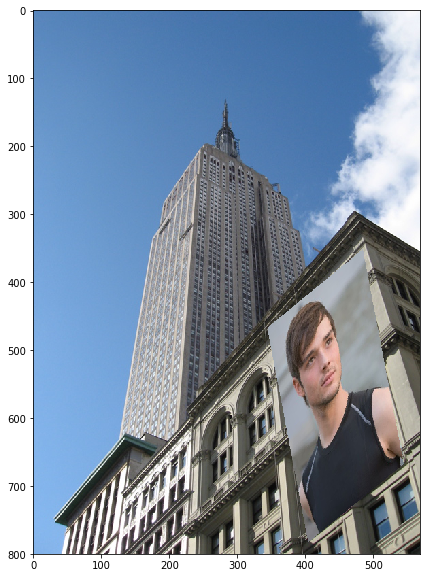

In [220]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
ima=plt.imread("ima.jpg")
imb=plt.imread("imb.jpg")
h=ima.shape[0] 
w=ima.shape[1]
Pa=np.array([[0,w,w,0],[0,0,h,h]]) #图像A上的4个点
Pb=np.array([[350,480,550,400],[500,320,700,750]]) #图像B上的4个对应
n=Pa.shape[1] #点数量
A=np.zeros((2*n,6),dtype=np.float32)
b=np.zeros((2*n,1),dtype=np.float32)
for i in range(n):
    A[i*2]=[Pa[0,i],Pa[1,i],0,0,1,0]
    A[i*2+1]=[0,0,Pa[0,i],Pa[1,i],0,1]
    b[i*2]=[Pb[0,i]]
    b[i*2+1]=[Pb[1,i]]
print("A=",A)
print("b=",b)
def f(X):
    X=X.reshape(-1,1)
    e=np.dot(A,X)-b
    return e.flatten() #根据least_squares函数的要求必须返回1维数组
X=np.array([1,1,1,1,1,1])
res=least_squares(f,X)
print("X=",res.x)
H=np.array([[res.x[0],res.x[1]],[res.x[2],res.x[3]]])
T=np.array([[res.x[4]],[res.x[5]]])
print("H=",H)
print("T=",T)
#验证
print("Pb-(HPa+T)=",Pb-(np.dot(H,Pa)+T))
#将A图移动到B图对应区域
for xa in range(w):
    for ya in range(h):
        pa=np.array([[xa],[ya]])
        pb=np.dot(H,pa)+T
        imb[int(pb[1]),int(pb[0])]=ima[pa[1],pa[0]]
plt.figure(figsize=(10,10))
plt.imshow(imb)

# 3.无约束最优化
可导函数的最优化采用如下函数：
- minimize(fun, x0[, args, method, jac, hess, …])	Minimization of scalar function of one or more variables.
- minimize_scalar(fun[, bracket, bounds, …])	Minimization of scalar function of one variable.

优化返回的结果为：
- OptimizeResult	Represents the optimization result.
- OptimizeWarning

The minimize function supports the following methods:
- minimize(method=’Nelder-Mead’)
- minimize(method=’Powell’)
- minimize(method=’CG’)
- minimize(method=’BFGS’)
- minimize(method=’Newton-CG’)
- minimize(method=’L-BFGS-B’)
- minimize(method=’TNC’)
- minimize(method=’COBYLA’)
- minimize(method=’SLSQP’)
- minimize(method=’trust-constr’)
- minimize(method=’dogleg’)
- minimize(method=’trust-ncg’)
- minimize(method=’trust-krylov’)
- minimize(method=’trust-exact’)

The minimize_scalar function supports the following methods:
- minimize_scalar(method=’brent’)
- minimize_scalar(method=’bounded’)
- minimize_scalar(method=’golden’)

以下函数在新的代码中不建议使用
General-purpose multivariate methods:

- fmin(func, x0[, args, xtol, ftol, maxiter, …])	Minimize a function using the downhill simplex algorithm.
- fmin_powell(func, x0[, args, xtol, ftol, …])	Minimize a function using modified Powell’s method.
- fmin_cg(f, x0[, fprime, args, gtol, norm, …])	Minimize a function using a nonlinear conjugate gradient algorithm.
- fmin_bfgs(f, x0[, fprime, args, gtol, norm, …])	Minimize a function using the BFGS algorithm.
- fmin_ncg(f, x0, fprime[, fhess_p, fhess, …])	Unconstrained minimization of a function using the Newton-CG method.

Univariate (scalar) minimization methods:

- fminbound(func, x1, x2[, args, xtol, …])	Bounded minimization for scalar functions.
- brent(func[, args, brack, tol, full_output, …])	Given a function of one-variable and a possible bracket, return the local minimum of the function isolated to a fractional precision of tol.
- golden(func[, args, brack, tol, …])	Return the minimum of a function of one variable using golden section method.

## 3.1 简单使用
minimize比minimize_scalar应用的场景更多，minimize_scalar是minimize的特例。

$X=\begin{bmatrix}x_1\\x_2\end{bmatrix}$

$f(X)=X^TCX+D=X^T\begin{bmatrix}2&3\\-2&1\end{bmatrix}X+5$

求解$\min f(X)$

$f(X)$对应的Jacobian Matrix为：

$J=\frac{\partial f(X)}{\partial X}=X^T(C+C^T)$(查矩阵微积分表[Matrix calculus](https://en.wikipedia.org/wiki/Matrix_calculus))

$f(X)$对应的Hessian Matrix为：

$H=\frac{\partial J}{\partial X}=C^T+C$(查矩阵微积分表[Matrix calculus](https://en.wikipedia.org/wiki/Matrix_calculus))

In [255]:
from scipy.optimize import minimize
import numpy as np
def f(X):
    X=X.reshape(-1,1)
    C=np.array([[2,3],[-2,1]])
    D=5
    return np.dot(np.dot(X.T,C),X)+D
def J(X):
    X=X.reshape(-1,1)
    C=np.array([[2,3],[-2,1]])
    return np.dot(X.T,C+C.T).flatten() #按照约定必须返回1维数组
def H(X):
    C=np.array([[2,3],[-2,1]])
    return C.T+C
res=minimize(f,x0=[300,400],method='Nelder-Mead')
print("method=Nelder-Mead,jac=None,hess=None,x=",res.x,"f(x)=",res.fun,"迭代次数=",res.nit,"f计算次数=",res.nfev)
res=minimize(f,x0=[300,400],method='BFGS',jac=J)
print("method=BFGS,jac=J,hess=None,x=",res.x,"f(x)=",res.fun,"迭代次数=",res.nit,"f计算次数=",res.nfev,"j计算次数=",res.njev)
res=minimize(f,x0=[300,400],method='Newton-CG',jac=J,hess=H)
print("method=Newton-CG,jac=J,hess=h,x=",res.x,"f(x)=",res.fun,"迭代次数=",res.nit,"f计算次数=",res.nfev,"j计算次数=",res.njev,"h计算次数=",res.nhev)

method=Nelder-Mead,jac=None,hess=None,x= [-1.86600858e-06  3.15663697e-05] f(x)= 5.000000000944497 迭代次数= 64 f计算次数= 122
method=BFGS,jac=J,hess=None,x= [-1.35026533e-08  2.82425139e-08] f(x)= 5.000000000000001 迭代次数= 8 f计算次数= 12 j计算次数= 12
method=Newton-CG,jac=J,hess=h,x= [ 1.73472348e-18 -1.73472348e-18] f(x)= [[5.]] 迭代次数= 9 f计算次数= 10 j计算次数= 18 h计算次数= 9


## 3.2 全变分降噪（total variation）——高数60分的方法
一张有噪声的图像$I$，通过TV（total variation）降噪得到图像$U$,首先如下定义：

$I_{ij}$和$U_{ij}$表示$I$和$U$在点$(i,j)$处的像素值,$I=(I_{11},I_{12},...,I_{mn})$,$U=(U_{11},U_{12},...,U_{mn})$

$\triangledown U_{ij}$表示$U$在$(i,j)$位置的梯度，即$\triangledown U_{ij}=(\frac{\partial U_{ij}}{\partial i},\frac{\partial U_{ij}}{\partial j})^T$

定义

$\frac{\partial U_{ij}}{\partial i}=U_{i+1 j}-U_{ij}$

$\frac{\partial U_{ij}}{\partial j}=U_{i j+1}-U_{ij}$


$U$满足如下优化条件：

$U=\mathop{\arg\min}_{U}f(U)=\mathop{\arg\min}_{U}||I-U||^2+2\lambda J(U)$

其中

$J(U)=\sum_{ij}||\triangledown U_{ij}||=\sum_{ij}\sqrt{(\frac{\partial U_{ij}}{\partial i})^2+(\frac{\partial U_{ij}}{\partial j})^2}$

为了解优化函数$f(U)$,需要求函数$f$关于$U$的Jacobian Matrix。因为$U=(U_{11},U_{12},...,U_{mn})$，所以：

$jac=(\frac{\partial f(U)}{\partial U_{11}},\frac{\partial f(U)}{\partial U_{12}},...,\frac{\partial f(U)}{\partial U_{mn}})$


$\frac{\partial f(U)}{\partial U_{ij}}=\frac{\partial (||I-U||^2+2\lambda J(U))}{\partial U_{ij}}=\frac{\partial ||I-U||^2}{\partial U_{ij}}+2\lambda\frac{\partial J(U)}{\partial U_{ij}}=-2(I_{ij}-U_{ij})+2\lambda\frac{\partial J(U)}{\partial U_{ij}}$

$\frac{\partial J(U)}{\partial U_{ij}}=\frac{\partial \sum_{ij}\sqrt{(\frac{\partial U_{ij}}{\partial i})^2+(\frac{\partial U_{ij}}{\partial j})^2}}{\partial U_{ij}}=\frac{\partial \sqrt{(\frac{\partial U_{ij}}{\partial i})^2+(\frac{\partial U_{ij}}{\partial j})^2}}{\partial U_{ij}}+\frac{\partial \sqrt{(\frac{\partial U_{i-1j}}{\partial i})^2+(\frac{\partial U_{i-1j}}{\partial j})^2}}{\partial U_{ij}}+\frac{\partial \sqrt{(\frac{\partial U_{ij-1}}{\partial i})^2+(\frac{\partial U_{ij-1}}{\partial j})^2}}{\partial U_{ij}}$

$\frac{\partial U_{ij}}{\partial i}=U_{i+1 j}-U_{ij}$

$\frac{\partial (\frac{\partial U_{ij}}{\partial i})}{\partial U_{ij}}=-1$

$\frac{\partial U_{ij}}{\partial j}=U_{i j+1}-U_{ij}$

$\frac{\partial (\frac{\partial U_{ij}}{\partial j})}{\partial U_{ij}}=-1$

$\frac{\partial U_{i-1j}}{\partial i}=U_{i j}-U_{i-1j}$

$\frac{\partial (\frac{\partial U_{i-1j}}{\partial i})}{\partial U_{ij}}=1$

$\frac{\partial U_{i-1j}}{\partial j}=U_{i-1 j+1}-U_{i-1j}$

$\frac{\partial (\frac{\partial U_{i-1j}}{\partial j})}{\partial U_{ij}}=0$

$\frac{\partial U_{ij-1}}{\partial i}=U_{i+1 j-1}-U_{ij-1}$

$\frac{\partial (\frac{\partial U_{ij-1}}{\partial i})}{\partial U_{ij}}=0$

$\frac{\partial U_{ij-1}}{\partial j}=U_{i j}-U_{ij-1}$

$\frac{\partial (\frac{\partial U_{ij-1}}{\partial j})}{\partial U_{ij}}=1$


$\frac{\partial J(U)}{\partial U_{ij}}=\frac{-\frac{\partial U_{ij}}{\partial i}-\frac{\partial U_{ij}}{\partial j}}{ \sqrt{(\frac{\partial U_{ij}}{\partial i})^2+(\frac{\partial U_{ij}}{\partial j})^2}}+\frac{\frac{\partial U_{i-1j}}{\partial i}}{ \sqrt{(\frac{\partial U_{i-1j}}{\partial i})^2+(\frac{\partial U_{i-1j}}{\partial j})^2}}+\frac{\frac{\partial U_{ij-1}}{\partial j}}{ \sqrt{(\frac{\partial U_{ij-1}}{\partial i})^2+(\frac{\partial U_{ij-1}}{\partial j})^2}}$

以下代码中变量与公式符号的对应关系：
- gi[i,j]：$\frac{\partial U_{ij}}{\partial i}$
- gj[i,j]：$\frac{\partial U_{ij}}{\partial j}$
- gi_i_1[i,j]：$\frac{\partial U_{i-1j}}{\partial i}$
- gj_i_1[i,j]：$\frac{\partial U_{i-1j}}{\partial j}$
- gi_j_1[i,j]：$\frac{\partial U_{ij-1}}{\partial i}$
- gj_j_1[i,j]：$\frac{\partial U_{ij-1}}{\partial j}$
- squared_gi[i,j]：$(\frac{\partial U_{ij}}{\partial i})^2$
- squared_gj[i,j]：$(\frac{\partial U_{ij}}{\partial j})^2$
- squared_gi_i_1[i,j]：$(\frac{\partial U_{i-1j}}{\partial i})^2$
- squared_gj_i_1[i,j]：$(\frac{\partial U_{i-1j}}{\partial j})^2$
- squared_gi_j_1[i,j]：$(\frac{\partial U_{ij-1}}{\partial i})^2$
- squared_gj_j_1[i,j]：$(\frac{\partial U_{ij-1}}{\partial j})^2$
- root_squared_gi_gj[i,j]：$\sqrt{(\frac{\partial U_{ij}}{\partial i})^2+(\frac{\partial U_{ij}}{\partial j})^2}$
- root_squared_gi_gj_i_1[i,j]：$\sqrt{(\frac{\partial U_{i-1j}}{\partial i})^2+(\frac{\partial U_{i-1j}}{\partial j})^2}$
- root_squared_gi_gj_j_1[i,j]：$\sqrt{(\frac{\partial U_{ij-1}}{\partial i})^2+(\frac{\partial U_{ij-1}}{\partial j})^2}$


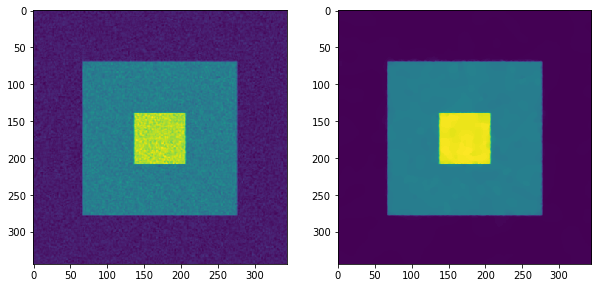

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.ndimage import convolve
I=plt.imread("noise.jpg") #带噪声的输入图像
I=I.astype(np.float32) #转换为float32，以便于后续计算
U0=I.copy() #初始时U与I相同
h,w=U0.shape #图像的高和宽
l=100 #公式中的λ
def J(U):
    gi=np.roll(U,-1,axis=1)-U #i方向偏导数
    gj=np.roll(U,-1,axis=0)-U #j方向偏导数
    return np.sum(np.sqrt(gi**2+gj**2)) #梯度的平方和开根号，再求和
def jac(U):
    U=U.reshape(h,w)
    gi=np.roll(U,-1,axis=1)-U #i方向偏导数
    gj=np.roll(U,-1,axis=0)-U #j方向偏导数
    #后续符号与公式的对应关系见前文
    gi_i_1=np.roll(gi,1,axis=1) 
    gj_i_1=np.roll(gj,1,axis=1)
    gi_j_1=np.roll(gi,1,axis=0)
    gj_j_1=np.roll(gj,1,axis=0)
    squared_gi=gi**2
    squared_gj=gj**2
    squared_gi_i_1=gi_i_1**2
    squared_gj_i_1=gj_i_1**2
    squared_gi_j_1=gi_j_1**2
    squared_gj_j_1=gj_j_1**2
    root_squared_gi_gj=np.sqrt(squared_gi+squared_gj)+1e-8 #1e-8是为了防止除0错误，sqrt的导数是分母
    root_squared_gi_gj_i_1=np.sqrt(squared_gi_i_1+squared_gj_i_1)+1e-8
    root_squared_gi_gj_j_1=np.sqrt(squared_gi_j_1+squared_gj_j_1)+1e-8
    ret=-2*(I-U)+2*l*(-(gi+gj)/root_squared_gi_gj+gi_i_1/root_squared_gi_gj_i_1+gj_j_1/root_squared_gi_gj_j_1)
    return ret.flatten()
def f(U):
    U=U.reshape(h,w)
    return np.sum((I-U)**2)+2*l*J(U) #最优化公式
res=minimize(f,x0=U0.flatten(),method='CG',jac=jac) #求解最优方程
Uk=res.x.reshape(h,w) #求解结果
#绘制
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(I.astype(np.uint8))
plt.subplot(1,2,2)
plt.imshow(Uk.astype(np.uint8))

## 3.3 全变分降噪（total variation）——高数0分以上的方法
利用TensorFlow库的自动求导方法，高数60分也能轻松解决问题。

注意：高数低于0分，还是回炉再造吧。

f= 24701296.0
f= 10213301.0
f= 7035921.5
f= 6302092.0


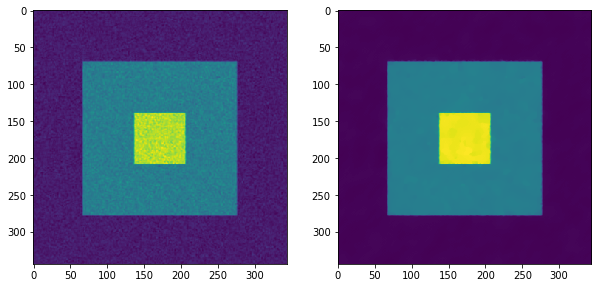

In [148]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
noise=plt.imread("noise.jpg") #带噪声的图像
h,w=noise.shape #图像高和宽

I=tf.constant(noise,dtype=tf.float32)
U=tf.Variable(noise,dtype=tf.float32)
gi=tf.manip.roll(U,-1,axis=1)-U
gj=tf.manip.roll(U,-1,axis=0)-U
JU=tf.reduce_sum(tf.sqrt(tf.square(gi)+tf.square(gj)+1e-8)) #1e-8是为了防止除0错误，sqrt的导数是分母
l=100 #公式中的λ
f=tf.reduce_sum(tf.square(I-U))+1/2*l*JU #||I-U||+2*λ*J(U)
#用梯度下降法进行优化
learning_rate=0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(f) #优化操作会自动针对变量U进行求导
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)#初始化
    epsilon=1e2 #优化结束条件
    f0=f.eval() #初始f值
    iter=0 #迭代次数
    while True:
        if iter%50==0:
            print("f=",f0) #每迭代50次输出一次f
        iter+=1
        sess.run(training_op) #梯度下降优化
        f1=f.eval() #优化后的f值（应该比f0更小）
        if np.abs(f1-f0)<epsilon: #优化前后的差异小于epsilon，优化结束
            break
        else:
            f0=f1
    U=U.eval()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(noise)
plt.subplot(1,2,2)
plt.imshow(U)

## 3.4 机器学习方法
注意：下列程序需要很长的运行时间，效果也没有前面的好，神经网络是随手编的，没有调参。

In [ ]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
noise=plt.imread("noise.jpg") #带噪声的图像
h,w=noise.shape #图像高和宽
images=np.zeros((1,h,w,1),dtype=np.float32)
images[0,:,:,0]=noise

I=tf.constant(images,dtype=tf.float32)
filters1=tf.Variable(tf.random_normal([5,5,1,7]),dtype=tf.float32)
filters2=tf.Variable(tf.random_normal([3,3,7,3]),dtype=tf.float32)
filters3=tf.Variable(tf.random_normal([1,1,3,1]),dtype=tf.float32)
layer1 = tf.nn.conv2d(I, filters1, strides=[1,1,1,1], padding="SAME")
layer2 = tf.nn.conv2d(layer1, filters2, strides=[1,1,1,1], padding="SAME")
U = tf.nn.conv2d(layer2, filters3, strides=[1,1,1,1], padding="SAME")
gi=tf.manip.roll(U,-1,axis=1)-U
gj=tf.manip.roll(U,-1,axis=0)-U
JU=tf.reduce_sum(tf.sqrt(tf.square(gi)+tf.square(gj)+1e-8)) #1e-8是为了防止除0错误，sqrt的导数是分母
l=100 #公式中的λ
f=tf.reduce_sum(tf.square(I-U))+1/2*l*JU #||I-U||+2*λ*J(U)
#用梯度下降法进行优化
learning_rate=0.1
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(f) #优化操作会自动针对变量U进行求导
init=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)#初始化
    epsilon=1e2 #优化结束条件
    f0=f.eval() #初始f值
    iter=0 #迭代次数
    while True:
        if iter%100==0:
            print("f=",f0) #每迭代50次输出一次f
        iter+=1
        sess.run(training_op) #梯度下降优化
        f1=f.eval() #优化后的f值（应该比f0更小）
        if np.abs(f1-f0)<epsilon: #优化前后的差异小于epsilon，优化结束
            break
        else:
            f0=f1
    U=U.eval()
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(noise)
    plt.subplot(1,2,2)
    plt.imshow(U[0,:,:,0])

f= 1227932000000.0
f= 95598930.0
f= 57784692.0
f= 38596210.0
f= 27903902.0
f= 22944836.0
f= 20965458.0
f= 19791778.0
f= 18778124.0
f= 17847756.0
f= 16999828.0
f= 16233675.0
f= 15545406.0
f= 14929536.0
f= 14377832.0
f= 13884429.0


# 4.有约束优化（Constrained optimization）
Constraints are passed to minimize function as a single object or as a list of objects from the following classes:

- NonlinearConstraint(fun, lb, ub[, jac, …])	Nonlinear constraint on the variables.[参考](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.NonlinearConstraint.html#scipy.optimize.NonlinearConstraint).
- LinearConstraint(A, lb, ub[, keep_feasible])	Linear constraint on the variables.[参考](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.LinearConstraint.html#scipy.optimize.LinearConstraint)

Simple bound constraints are handled separately and there is a special class for them:

- Bounds(lb, ub[, keep_feasible])	Bounds constraint on the variables.[参考](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.Bounds.html#scipy.optimize.Bounds)

求解

$\min f(x_0,x_1)=x_0^2+x_1^2$

且

$-2\le x_0 \le -0.5$

$1.0\le x_0 \le 2.0$

In [172]:
import numpy as np
from scipy.optimize import minimize
def f(x):
    x0=x[0]
    x1=x[1]
    return x0**2+x1**2
res=minimize(f,x0=[-1.5,1.5],bounds=([-2, -0.5], [1.0, 2.0]))
print(res.x)

[-0.5  1. ]


求解

$\min f(x_0,x_1)=x_0^2+x_1^2$

且

$c_1: x_0+x_1-2\ge 0$

$c_2: x_0-x_1+3\ge 0$

In [175]:
import numpy as np
from scipy.optimize import minimize
def f(x):
    x0=x[0]
    x1=x[1]
    return x0**2+x1**2
def c1(x):
    return x[0]+x[1]-2
def c2(x):
    return x[0]-x[1]+3
cons={"type":"ineq","fun":lambda x:[c1(x),c2(x)]}
res=minimize(f,x0=[-1.5,1.5],constraints=cons)
print(res.x)

[0.99995121 1.00004879]


# 5.线性规划（Linear Programming）
General linear programming solver:

- linprog(c[, A_ub, b_ub, A_eq, b_eq, bounds, …])	Minimize a linear objective function subject to linear equality and inequality constraints.

The linprog function supports the following methods:

- linprog(method=’simplex’)
- linprog(method=’interior-point’)

线性规划问题的标准形式

$\max f=C^TX$

并且

$AX=b$

$X\ge 0$

其中$C$是$n\times 1$的列，$X$是$n\times 1$的列向量，$A$是$m \times n$的矩阵，$b$是$m \times 1$的列向量。

例题：

某机床厂生产甲、乙两种机床，每台销售后的利润分别为4000元与3000元.生产甲机床需用A、 B机器加工，加工时间分别为 每台2h和1h；生产乙机床需用A、B、C三种机器加工，加工时间为每台各1h.若每天可用于加工的机器时数分别为A机器10h、B机器8h和C机器7h，问该厂每天应生产甲、乙机床各几台，才能使总利润最大？

解：

$$\max f=4000x_1+3000x_2\\
 s.t.\left\{
\begin{aligned}
2x_1+x_2\le10 \\
x_1+x_2\le8 \\
x_2\le7\\
x_1\ge0\\
x_2\ge0
\end{aligned}
\right.
$$

上述公式可以通过引入额外变量变成标准形式：

$$\max f=4000x_1+3000x_2\\
 s.t.\left\{
\begin{aligned}
2x_1+x_2-10+x_3=0 \\
x_1+x_2-8+x_4=0 \\
x_2-7+x_5=0\\
x_1\ge0\\
x_2\ge0\\
x_3\ge0\\
x_4\ge0\\
x_5\ge0\\
\end{aligned}
\right.
$$


## 5.1用minimize函数求解
首先变化公式为求极小值，小于等于改为大于等于
$$\min f=-4000x_1-3000x_2\\
 s.t.\left\{
\begin{aligned}
-2x_1-x_2+10\ge0 \\
-x_1-x_2+8\ge0 \\
-x_2+7\ge0\\
x_1\ge0\\
x_2\ge0
\end{aligned}
\right.
$$

In [2]:
import numpy as np
from scipy.optimize import minimize
def f(x):
    return -4000*x[0]-3000*x[1]
def c1(x):
    return -2*x[0]-x[1]+10
def c2(x):
    return -x[0]-x[1]+8
def c3(x):
    return -x[1]+7
def c4(x):
    return x[0]
def c5(x):
    return x[1]
cons={"type":"ineq","fun":lambda x:[c1(x),c2(x),c3(x),c4(x),c5(x)]}
res=minimize(f,x0=[0,0],constraints=cons)
print("x1=",res.x[0],"x2=",res.x[1],"max f=",-f(res.x))

x1= 2.000001879246156 x2= 6.0000014268057384 max f= 26000.01179740184


## 5.2 用线性规划函数计算
linprog(c, A_ub=None, b_ub=None, A_eq=None, b_eq=None, bounds=None, method='simplex', callback=None, options=None)
    Minimize a linear objective function subject to linear
    equality and inequality constraints.
    
    Linear Programming is intended to solve the following problem form:
    
    Minimize:     c^T * x
    
    Subject to:   A_ub * x <= b_ub
                  A_eq * x == b_eq

故此需要对原始问题进行转换：
$$\min f=-4000x_1-3000x_2=\begin{bmatrix}-4000&-3000\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix}\\
C=\begin{bmatrix}-4000\\-3000\end{bmatrix}\\
 s.t.\left\{
\begin{aligned}
2x_1+x_2\le10 \\
x_1+x_2\le8 \\
x_2\le7\\
-x_1\le0\\
-x_2\le0
\end{aligned}=>s.t.\begin{bmatrix}2&1\\1&1\\0&1\\-1&0\\0&-1\end{bmatrix}\begin{bmatrix}x_1\\x_2\end{bmatrix}\le\begin{bmatrix}10\\8\\7\\0\\0\end{bmatrix}
\right.\\
A\_ub=\begin{bmatrix}2&1\\1&1\\0&1\\-1&0\\0&-1\end{bmatrix}\\
b\_ub=\begin{bmatrix}10\\8\\7\\0\\0\end{bmatrix}
$$

In [9]:
import numpy as np
from scipy.optimize import linprog
c=np.array([-4000,-3000])
A_ub=np.array([[2,1],[1,1],[0,1],[-1,0],[0,-1]])
b_ub=np.array([10,8,7,0,0])
res=linprog(c,A_ub=A_ub,b_ub=b_ub)
print("x1=",res.x[0],"x2=",res.x[1],"max f=",-res.fun)

x1= 2.0 x2= 6.0 max f= 26000.0


# 6.全局优化
采用类似蛮力法（穷举）解决最优化问题

- basinhopping(func, x0[, niter, T, stepsize, …])	Find the global minimum of a function using the basin-hopping algorithm
- brute(func, ranges[, args, Ns, full_output, …])	Minimize a function over a given range by brute force.
- differential_evolution(func, bounds[, args, …])	Finds the global minimum of a multivariate function.


In [18]:
from scipy.optimize import basinhopping
import numpy as np

def f(x):
    return x[0]**2+np.sin(x[1])
res=basinhopping(f,x0=[10,20]) 
print("x0=",res.x[0],"x1=",res.x[1],"min f=",res.fun)

x0= 5.91771934190297e-09 x1= 17.278759585708816 min f= -1.0


# 7.其他优化

- [最短路径](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm)
- [邮差问题](https://en.wikipedia.org/wiki/Travelling_salesman_problem)
- [背包问题](https://en.wikipedia.org/wiki/Knapsack_problem)
- [最大流/最小割问题](https://en.wikipedia.org/wiki/Max-flow_min-cut_theorem)
- [整数优化](https://en.wikipedia.org/wiki/Integer_programming)
- [模拟退火算法](https://en.wikipedia.org/wiki/Simulated_annealing)
- [粒子群算法](https://en.wikipedia.org/wiki/Particle_swarm_optimization)
- [遗传算法](https://en.wikipedia.org/wiki/Genetic_algorithm)
- [蚁群算法](https://en.wikipedia.org/wiki/Ant_colony_optimization_algorithms)
- [最优停止问题](https://en.wikipedia.org/wiki/Optimal_stopping)
- 还有很多

以上问题已经被科学家充分研究，并且有广泛的应用，并很容易找到程序代码。如果你懒得去找，请参考[这里](https://en.wikipedia.org/wiki/List_of_optimization_software)。